DATA PROCESSING AND DATA AUG.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --quiet neural-structured-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 KB 4.1 MB/s eta 0:00:00


In [ ]:
import glob
train_classes = glob.glob('/content/drive/MyDrive/train1')
train_classes
val_classes = glob.glob('/content/drive/MyDrive/valid1')
val_classes

['/content/drive/MyDrive/valid1']

In [ ]:
!pip install -q keras
!pip install np_utils
import keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56460 sha256=77813a7c7aac52110f6bb93615677b785bfc3fa85d350b9996ee95bb93ace84e
  Stored in directory: /root/.cache/pip/wheels/65/07/4b/1c96f437e1bec60b3d2acd0b81d0a7969505f5251efbb5a060
Successfully built np_utils


In [ ]:
!pip install Keras-Preprocessing
from keras_preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.2 MB/s eta 0:00:00


In [ ]:
train_agument = ImageDataGenerator(rescale = 1./255,
                                   rotation_range= 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_agumented_set = train_agument.flow_from_directory(directory="/content/drive/MyDrive/train1",
                                                        target_size = (224,224),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 6011 images belonging to 4 classes.


In [ ]:
len(train_agumented_set)


188

In [ ]:
def plotImage(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (20, 20))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    plt.tight_layout()
    plt.show()

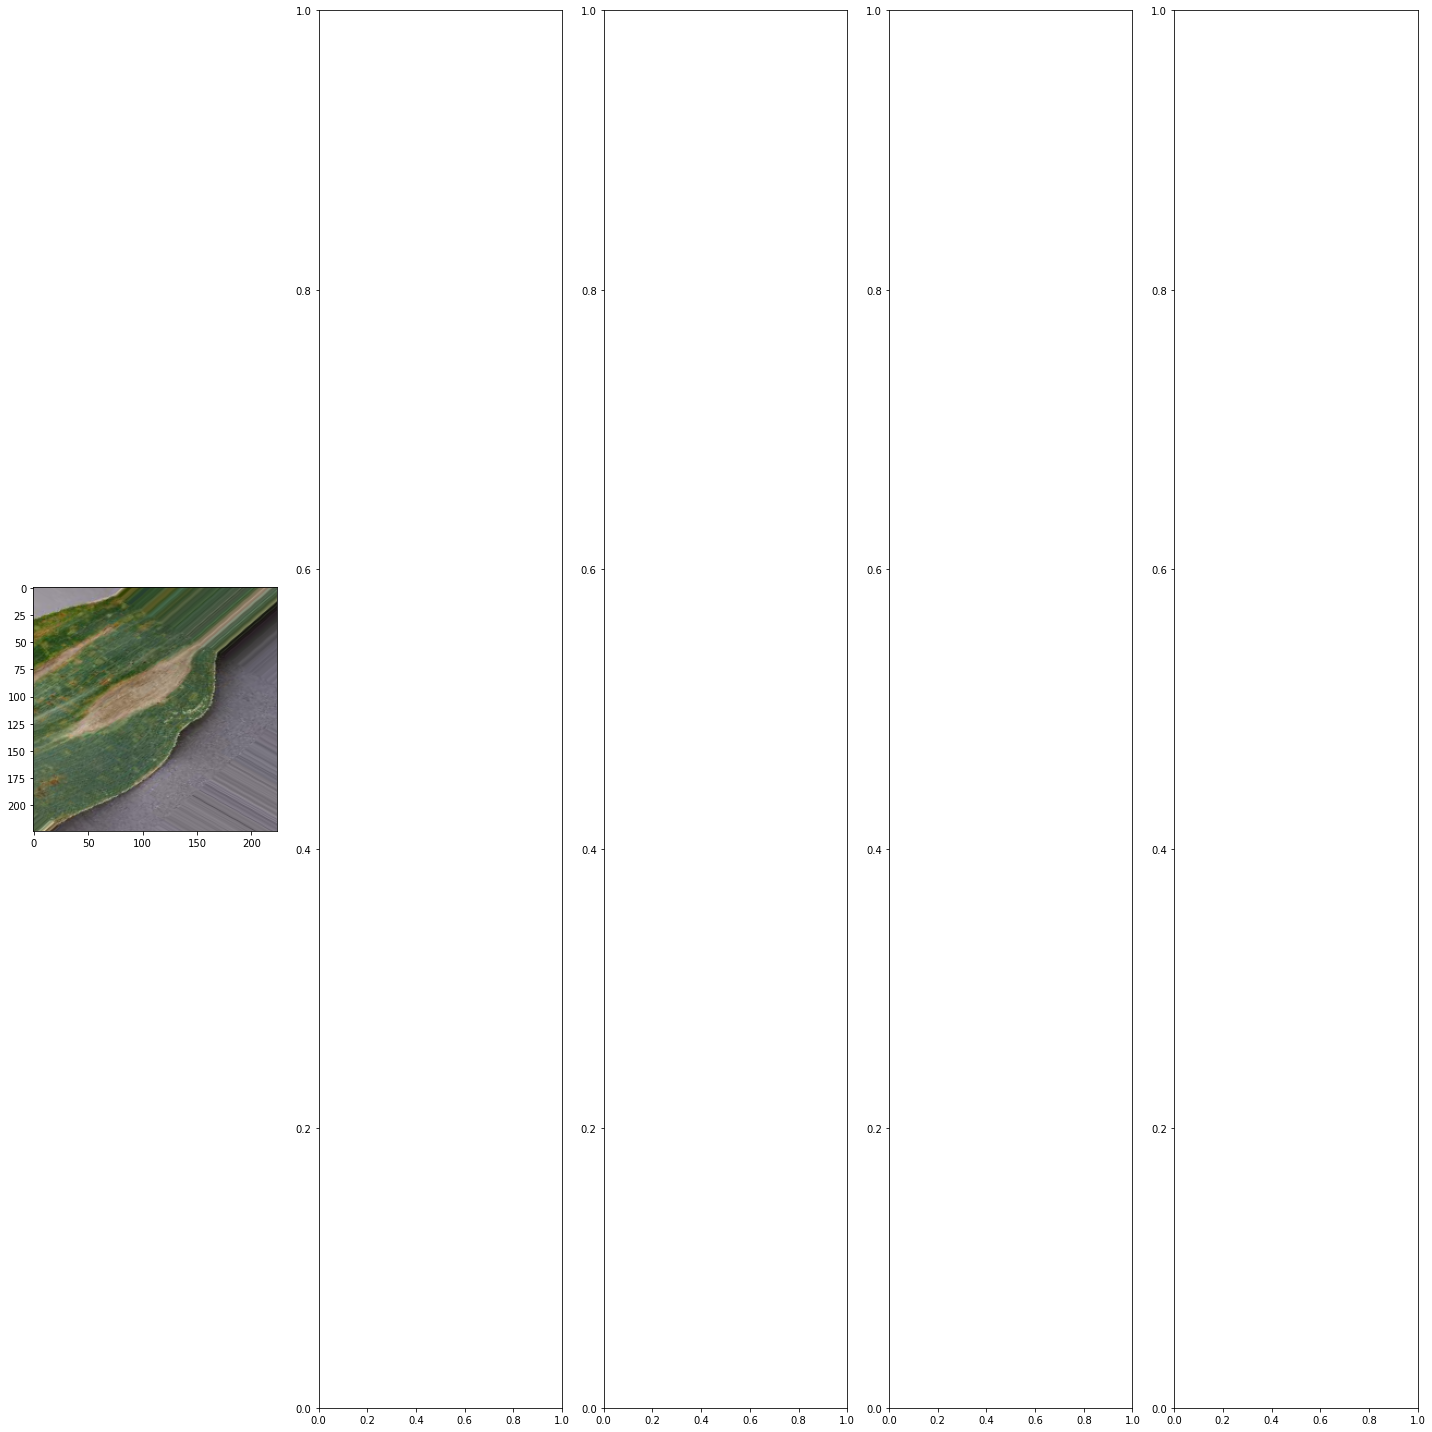

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
images = [train_agumented_set[0][0][0] for i in range(5)]
plotImage(images)

In [ ]:
val_agument = ImageDataGenerator(rescale=1./255)
val_agumented_set = val_agument.flow_from_directory('/content/drive/MyDrive/valid1',
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1829 images belonging to 4 classes.


In [ ]:
len(val_agumented_set)

58

In [ ]:
train_agumented_set.class_indices
val_agumented_set.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3}

Transfer Learning using InceptionV3 : 23,851,784 parameters

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
transfer_model = InceptionV3(input_shape= [224, 224] + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in transfer_model.layers:
  layer.trainable = False

In [ ]:
no_of_classes = glob('/content/drive/MyDrive/train1')

In [ ]:
no_of_classes

['/content/drive/MyDrive/train1']

In [ ]:
Bottle_neck_layer_output = Flatten()(transfer_model.output)

In [ ]:
len(no_of_classes)

1

In [ ]:
output_layer = Dense(4, activation = 'softmax')(Bottle_neck_layer_output)

STEP 1: MODEL BUILDING

In [ ]:
transfer_learning_model = Model(inputs = transfer_model.input, outputs = output_layer)

In [ ]:
transfer_learning_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

COMPILATION TIME!

In [ ]:
transfer_learning_model.compile(loss = 'CategoricalCrossentropy',
                                optimizer = 'adam',
                                metrics = ['accuracy'])


FITTING THE MODEL

In [ ]:
result = transfer_learning_model.fit(train_agumented_set,
                                               epochs = 50,
                                               steps_per_epoch = 32,
                                               validation_data = val_agumented_set,
                                               validation_steps = 8)

Epoch 1/50
32/32 [==============================] - 431s 13s/step - loss: 3.9309 - accuracy: 0.7148 - val_loss: 0.9192 - val_accuracy: 0.8828
Epoch 2/50
32/32 [==============================] - 337s 10s/step - loss: 0.7005 - accuracy: 0.9043 - val_loss: 1.2843 - val_accuracy: 0.8008
Epoch 3/50
32/32 [==============================] - 315s 10s/step - loss: 0.5940 - accuracy: 0.9111 - val_loss: 1.3886 - val_accuracy: 0.8516
Epoch 4/50
32/32 [==============================] - 252s 8s/step - loss: 0.6845 - accuracy: 0.9160 - val_loss: 0.6006 - val_accuracy: 0.9102
Epoch 5/50
32/32 [==============================] - 265s 8s/step - loss: 0.6392 - accuracy: 0.9180 - val_loss: 1.6034 - val_accuracy: 0.8242
Epoch 6/50
32/32 [==============================] - 205s 6s/step - loss: 0.6590 - accuracy: 0.9160 - val_loss: 1.0058 - val_accuracy: 0.8945
Epoch 7/50
32/32 [==============================] - 199s 6s/step - loss: 0.5474 - accuracy: 0.9277 - val_loss: 0.8292 - val_accuracy: 0.8984
Epoch 8/50

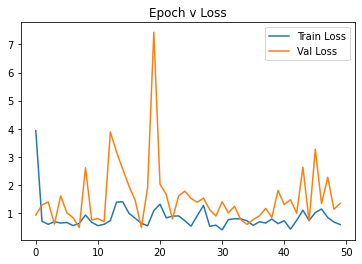

<Figure size 432x288 with 0 Axes>

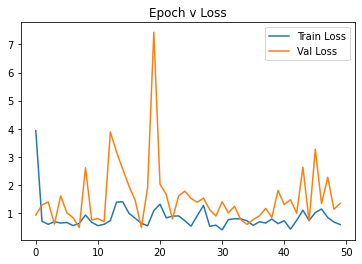

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(result.history['loss'], label = 'Train Loss')
plt.plot(result.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.title('Epoch v Loss')
plt.show()
plt.savefig('LossVal_Loss')

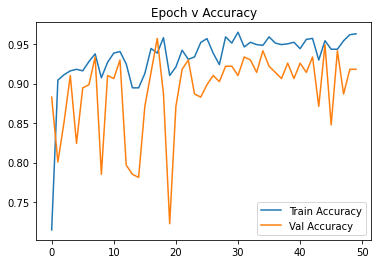

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(result.history['accuracy'], label = 'Train Accuracy')
plt.plot(result.history['val_accuracy'], label = 'Val Accuracy')
plt.legend()
plt.title('Epoch v Accuracy')
plt.show()
plt.savefig('AccVal_Acc')

Transfer Leraned Model Eval. with a Val set

In [ ]:
y_prediction = transfer_learning_model.predict(val_agumented_set)
y_prediction

58/58 [==============================] - 233s 4s/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01],
       [3.3897561e-27, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00],
       [1.9908373e-25, 1.9671966e-29, 5.5218918e-31, 9.9999994e-01],
       ...,
       [8.4035880e-14, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [2.7346551e-28, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.7873781e-37, 6.3604776e-26, 1.0446167e-33]],
      dtype=float32)

Predicting class of each image

In [ ]:
y_prediction = np.argmax(y_prediction, axis=1)


In [ ]:
y_prediction

array([3, 1, 3, ..., 2, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
transfer_learning_model.save('inceptionv3.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
incept = load_model('inceptionv3.h5')

In [ ]:
acc = incept.evaluate_generator(val_agumented_set)[1]
print(f"The accuracy of our model is : {acc*100}%")

<ipython-input-37-ef7d57f37bf2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = incept.evaluate_generator(val_agumented_set)[1]


The accuracy of our model is : 91.52542352676392%


## **The accuracy of our model is : 91.52542352676392%**

In [ ]:
img_1 = image.load_img('/content/drive/MyDrive/testyy.JPG', target_size=(224, 224))
arr_img = image.img_to_array(img_1)

In [ ]:
arr_img

In [ ]:
arr_img = arr_img / 255

In [ ]:
import numpy as np
arr_img = np.expand_dims(arr_img, axis = 0)
img_data = preprocess_input(arr_img)
img_data.shape

(1, 224, 224, 3)

In [ ]:
prediction = incept.predict(img_data)

1/1 [==============================] - 1s 1s/step


In [ ]:
prediction

array([[6.1788847e-20, 1.0000000e+00, 4.7988517e-26, 9.4161857e-18]],
      dtype=float32)

In [ ]:
thisdict = {
  0: "Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot",
  1: "Corn_(maize)_Common_rust",
  2: "Corn_(maize)_Northern_Leaf_Blight",
  3: "Corn_(maize)_healthy"
}

In [ ]:
class_index = np.argmax(prediction, axis = 1)
print(f"The image belongs to : ", thisdict[cl])

array([1])

0 : Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

1 : Corn_(maize)___Common_rust

2 : Corn_(maize)___Northern_Leaf_Blight

3 : Corn_(maize)___healthy